## ST1516 DEVOPS AND AUTOMATION FOR AI (DOAA) CA2 ASSIGNMENT
NAME: EDWARD TAN YUAN CHONG

CLASS: DAAA/FT/2B/04

ADM NO.: 2214407

### IMPORT MODULES

In [18]:
from keras.models import load_model
from sklearn.metrics import classification_report
from visualkeras import layered_view
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

### SEABORN CUSTOMIZATIONS

In [7]:
# Change theme of charts
sns.set_theme(style='darkgrid')
# # Change font of charts
# sns.set(font='Century Gothic')
# Variable for color palettes
color_palette = sns.color_palette('muted')

### IMPORT DATA

We will only be importing the test data to verify that our model and its weights are correctly imported later on. Following the DELE CA1 assignment for Part A, the images are resized to 128x128 and 31x31, and are grayscaled as well.

In [8]:
# The two different image sizes
image_size_128 = (128,128)
image_size_31 = (31,31)

def load_all_images(image_size, dataset_type):
    # Normalization
    datagen = ImageDataGenerator(rescale=1./255) 
    # Load image from directory
    generator = datagen.flow_from_directory(
        f"Dataset for CA1 part A/{dataset_type}",  
        target_size=image_size,
        color_mode='grayscale',
        batch_size=64, 
        class_mode='binary',
        shuffle=False
    )
    # List to store all the images and labels
    all_images = []
    all_labels = []
    # Calculate the number of loops needed to load all images and labels
    num_batches = len(generator)
    # Loop the number of loops needed and append each batch to the list
    for i in range(num_batches):
        batch_images, batch_labels = next(generator)
        all_images.extend(batch_images)
        all_labels.extend(batch_labels)
    # Return NumPy arrays
    return np.array(all_images), np.array(all_labels)

# Load datasets for 128x128 image size
X_test_128, y_test_128 = load_all_images(image_size_128, 'test')
# Load datasets for 31x31 image size
X_test_31, y_test_31 = load_all_images(image_size_31, 'test')

# Print length of each train, test, validation dataset
print(f"\n\nImage size: {image_size_128}")
print(f'Length of test array: {len(X_test_128)}.\n\n')
print(f'Length of test_label array: {len(y_test_128)}\n')
print("-"*50)
print(f"\n\nImage size: {image_size_31}")
print(f'Length of test array: {len(X_test_31)}.\n\n')
print(f'Length of test_label array: {len(y_test_31)}.')



Found 3000 images belonging to 15 classes.


Found 3000 images belonging to 15 classes.


Image size: (128, 128)
Length of test array: 3000.


Length of test_label array: 3000

--------------------------------------------------


Image size: (31, 31)
Length of test array: 3000.


Length of test_label array: 3000.


### ONE-HOT ENCODING LABELS

We will also need to one-hot encode labels for evaluation later on, which is done with tensorflow keras utility library `to_categorical()`.

In [9]:
# One-hot encode y_test
y_test = to_categorical(y=y_test_128)

#### LABELS

In [10]:
# Variables
labels = {
    0: 'Bean', 
    1: 'Bitter_Gourd',
    2: 'Bottle_Gourd', 
    3: 'Brinjal', 
    4: 'Broccoli', 
    5: 'Cabbage', 
    6: 'Capsicum', 
    7: 'Carrot', 
    8: 'Cauliflower', 
    9: 'Cucumber', 
    10: 'Papaya', 
    11: 'Potato', 
    12: 'Pumpkin', 
    13: 'Radish', 
    14: 'Tomato'
}

## IMPORTING & TESTING MODEL

### EVALUATION FUNCTIONS

In [11]:
# Confusion matrix of results
def confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(14,14))
    sns.heatmap(
        tf.math.confusion_matrix(y_test, y_pred, num_classes=15), 
        annot=True, 
        xticklabels=labels.values(), 
        yticklabels=labels.values(), 
        cmap='icefire',
        fmt='d'
    ).set(title='Confusion Matrix' + title, xlabel='Predicted', ylabel='Actual')
    plt.show()

# Error analysis images plot
def error_analysis(X_test, y_test, y_pred, labels, title):
    # Get incorrect predictions
    data = {'y_test': y_test, 'y_pred': y_pred}
    y_df = pd.DataFrame(data)
    incorrect_predictions = y_df[y_df['y_test'] != y_df['y_pred']][:30]
    # Number of rows
    n_rows = math.ceil(len(incorrect_predictions) / 5)
    fig, axes = plt.subplots(n_rows, 5, figsize=(20, 20))
    axes = axes.flatten()
    # Plotting the incorrect predictions
    for idx, (index, row) in enumerate(incorrect_predictions.iterrows()):
        ax = axes[idx]
        ax.imshow(X_test[index], cmap='gray')
        ax.set_title(f"Actual: {labels[row['y_test']]}\nPredicted: {labels[row['y_pred']]}")
        ax.axis('off')
    # Turn off axes for any unused subplots
    for ax in axes[len(incorrect_predictions):]:
        ax.axis('off')
    # Title
    fig.suptitle(t="Error analysis of"+title, y=0.91)
    plt.show()


def error_analysis(X_test, y_test, y_pred, labels, title):
    # Get incorrect predictions
    data = {'y_test': y_test, 'y_pred': y_pred}
    y_df = pd.DataFrame(data)
    incorrect_predictions = y_df[y_df['y_test'] != y_df['y_pred']]
    incorrect_predictions_30 = incorrect_predictions[:30]
    # Print number of incorrect predictions
    print("x" + "-"*50 + "x")
    print(f"Number of incorrect predictions in total: {len(incorrect_predictions)}")
    print("x" + "-"*50 + "x")
    # Number of rows
    n_rows = math.ceil(len(incorrect_predictions_30) / 5)
    fig, axes = plt.subplots(n_rows, 5, figsize=(20, 20))
    axes = axes.flatten()
    # Plotting the incorrect predictions
    for idx, (index, row) in enumerate(incorrect_predictions_30.iterrows()):
        ax = axes[idx]
        ax.imshow(X_test[index], cmap='gray')
        ax.set_title(f"Actual: {labels[row['y_test']]}\nPredicted: {labels[row['y_pred']]}")
        ax.axis('off')
    # Turn off axes for any unused subplots
    for ax in axes[len(incorrect_predictions_30):]:
        ax.axis('off')
    # Title
    fig.suptitle(t="Error analysis of"+title, y=0.91)
    plt.show()

### CONV2D MODEL - 128x128 IMAGES

- We will utilize the Keras library's `load_model()` function to load my DELE CA1 CNN best model for 128x128 images, which was a custom built convolutional neural network. 

In [12]:
conv2d_128 = load_model("./model_weights/conv2d_128.h5")

#### MODEL SUMMARY

- We use `.summary()` on the model to ensure that it has been successfully loaded and view its architecture.
- The visualkeras and tensorflow keras utility library is also used to show the architecture in an image style

In [13]:
conv2d_128.summary()

Model: "FinalConv2D128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 64)      1088      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                               

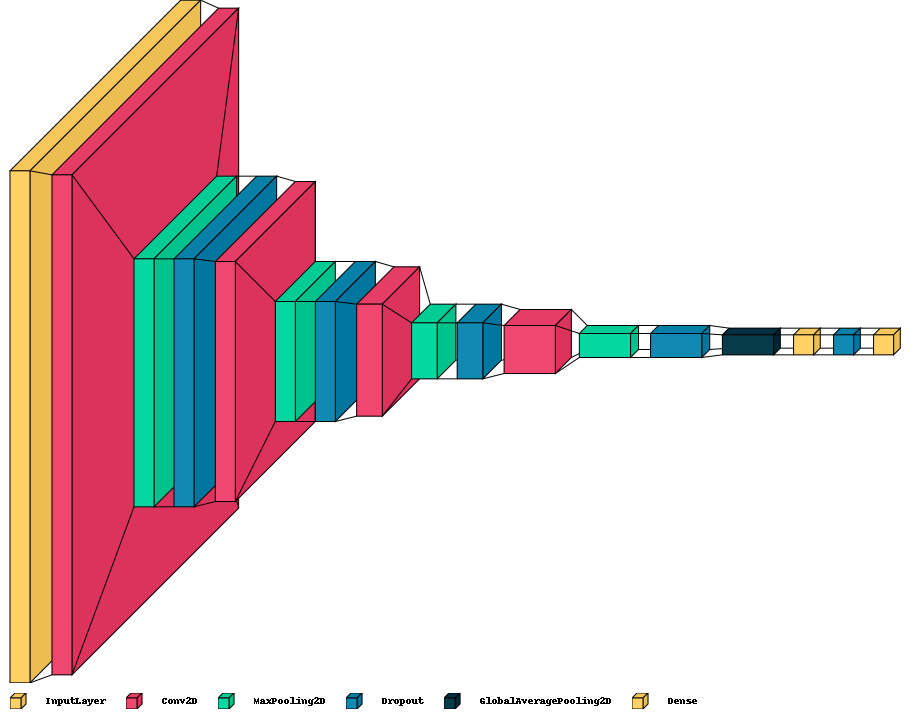

In [14]:
layered_view(conv2d_128,
             legend=True,
             spacing=20
)

#### PREDICT FOR Y_PRED

Used `.predict()` to obtain predictions of the final model on the testing data. This allows us to use its predictions to verify the model and its weights have been successfully imported correctly.

In [15]:
y_pred_128 = conv2d_128.predict(X_test_128)
y_pred_128

94/94 [==============================] - 18s 187ms/step


array([[9.9998784e-01, 4.8009301e-06, 1.9927766e-11, ..., 4.2416320e-10,
        2.6031596e-10, 1.5276635e-08],
       [1.0000000e+00, 2.7679690e-12, 1.3531709e-18, ..., 1.2633899e-16,
        5.6432236e-19, 2.4937380e-10],
       [9.7311324e-01, 7.4708294e-03, 7.6567261e-08, ..., 2.1213140e-05,
        2.2532136e-07, 1.5195239e-04],
       ...,
       [5.3552746e-10, 5.9829536e-10, 8.6132324e-18, ..., 2.1695321e-11,
        1.5883395e-10, 9.9999988e-01],
       [2.9603275e-04, 2.6420665e-07, 7.3460378e-12, ..., 2.1851686e-06,
        6.5188260e-08, 9.9969459e-01],
       [3.6148336e-03, 2.2181816e-06, 7.7026364e-08, ..., 2.5347604e-03,
        1.3724868e-06, 3.9216205e-01]], dtype=float32)

#### CLASSIFICATION REPORT

Utilized Scikit-Learn's `classification_report()` to get a classification report of the model's performance, having metrics such as Precision, Recall, and F1-score.

- Precision: Ratio of true positives to total number of positive predictions [MINIMIZE FALSE POSITIVES]
    - Formula: True Positives / (True Positives + False Positives)

- Recall: Ratio of true positives to total number of actual positive predictions [MINIMIZE FALSE NEGATIVES]
    - Formula: True Positives / (True Positives + False Negatives)

- F1 score: Combines precision and recall scores
    - Formula: 2 * (Precision * Recall) / (Precision + Recall)


In [16]:
# Get binary label using np.argmax() to get index. E.g. np.argmax([0,0,0,1]) will return binary value 3
y_test_binary, y_pred_128_binary = np.argmax(y_test, axis=1), np.argmax(y_pred_128, axis=1)
report_128 = classification_report(y_test_binary, y_pred_128_binary, target_names=labels.values())
print(report_128)

              precision    recall  f1-score   support

        Bean       0.98      0.99      0.98       200
Bitter_Gourd       0.99      0.98      0.99       200
Bottle_Gourd       0.99      1.00      0.99       200
     Brinjal       0.99      0.99      0.99       200
    Broccoli       0.97      0.98      0.98       200
     Cabbage       0.98      0.99      0.99       200
    Capsicum       0.98      0.98      0.98       200
      Carrot       0.98      0.98      0.98       200
 Cauliflower       0.96      0.98      0.97       200
    Cucumber       0.98      1.00      0.99       200
      Papaya       1.00      0.97      0.98       200
      Potato       0.99      0.98      0.99       200
     Pumpkin       0.99      0.97      0.98       200
      Radish       0.99      0.97      0.98       200
      Tomato       0.99      0.97      0.98       200

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98   

#### CONFUSION MATRIX

Plotted a confusion matrix to visualize how well the model predicts each label of vegetables.

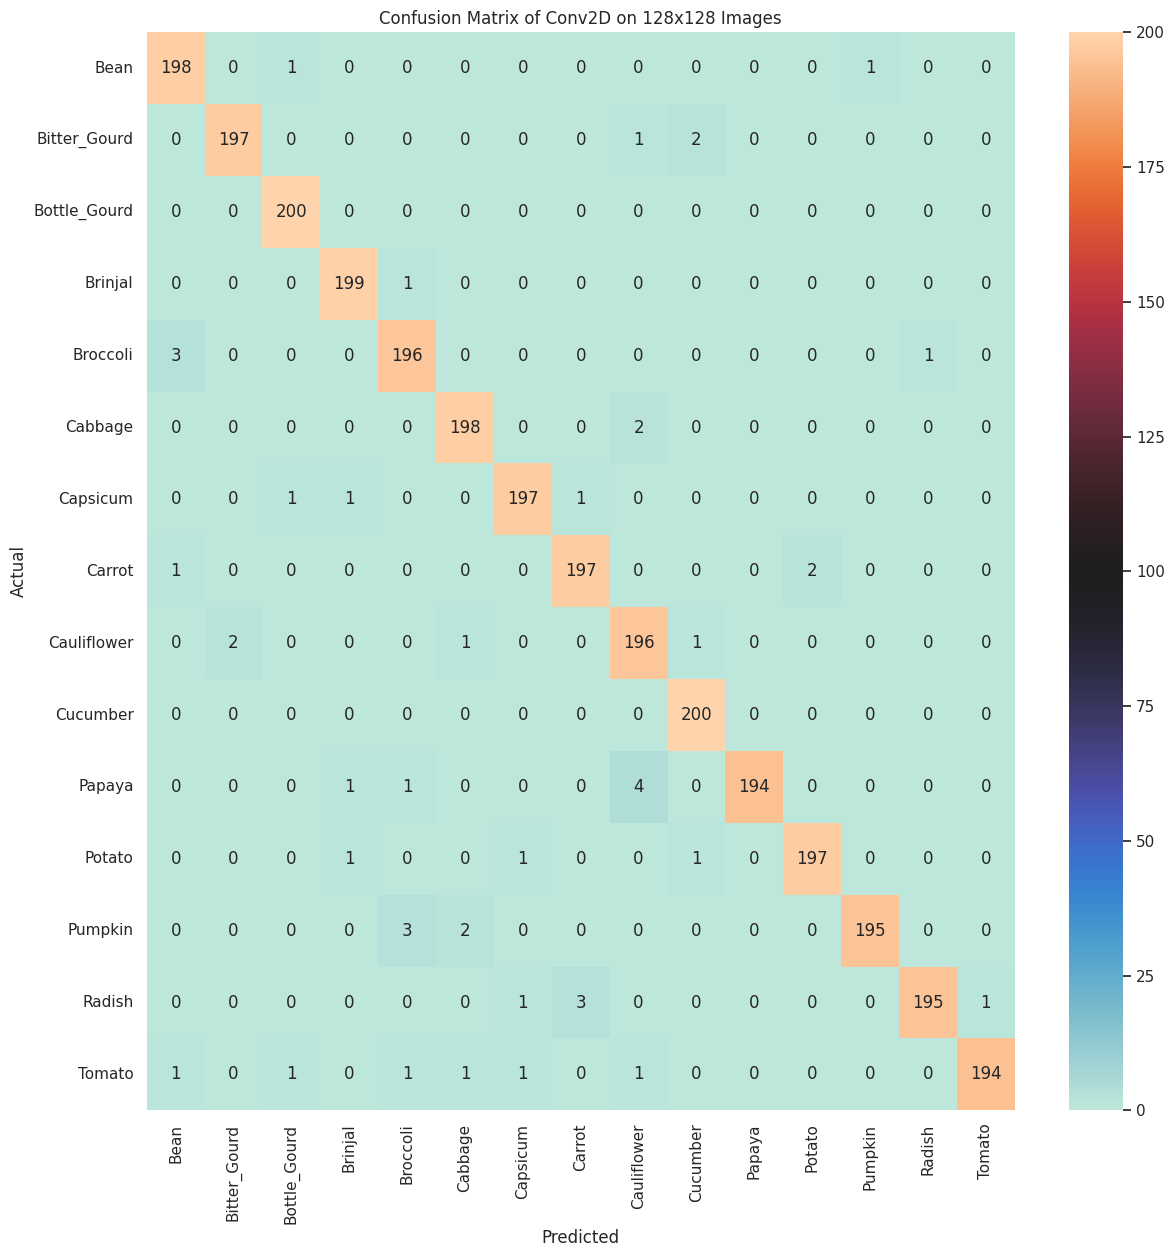

In [20]:
confusion_matrix(y_test=y_test_binary, y_pred=y_pred_128_binary, title=' of Conv2D on 128x128 Images')

#### ERROR ANALYSIS

For the error analysis, I plotted the first 30 incorrect predictions made by the model to visualize where the model went wrong in its vegetable prediction.

x--------------------------------------------------x
Number of incorrect predictions in total: 47
x--------------------------------------------------x


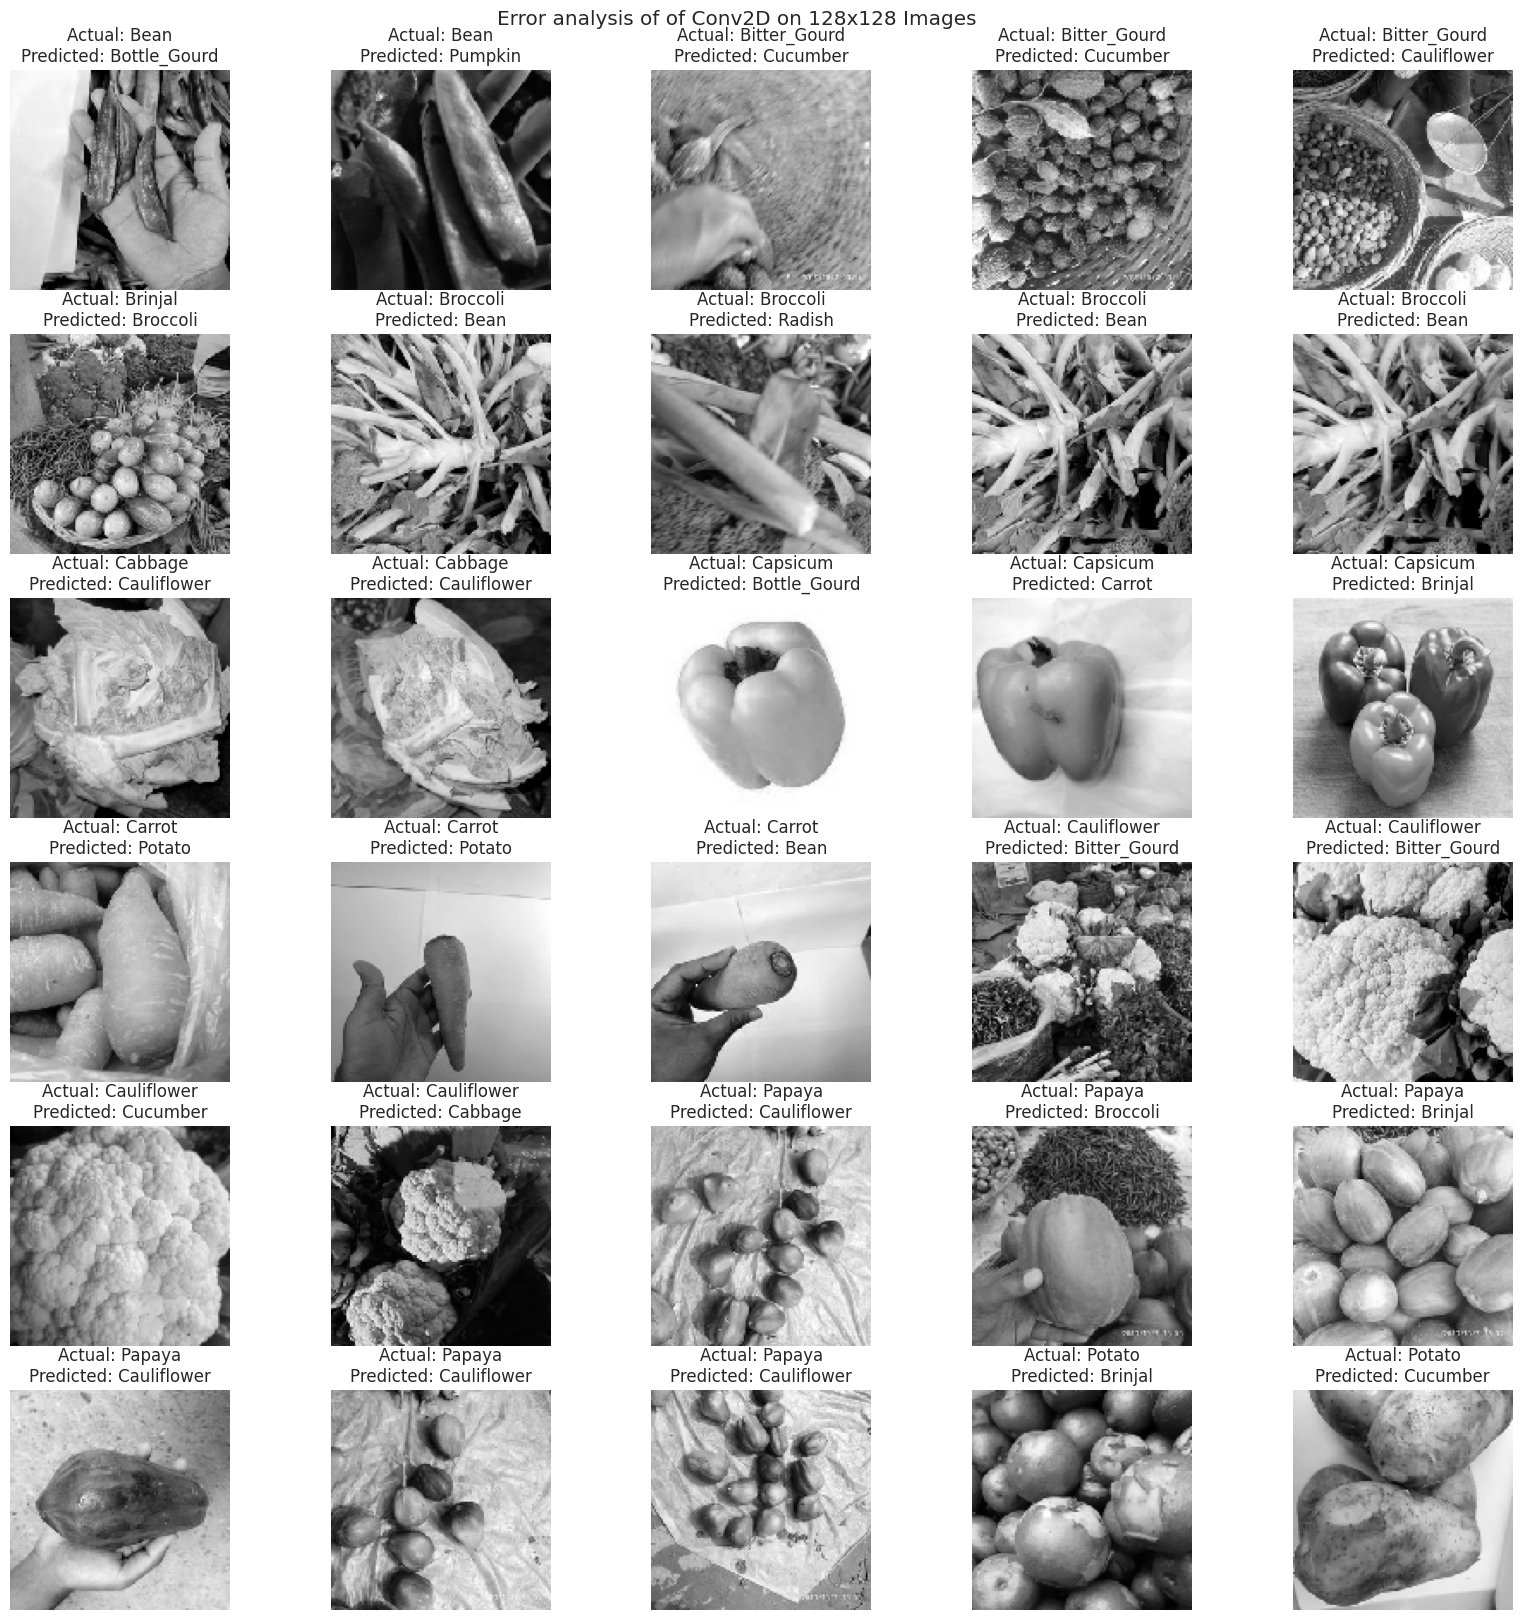

In [21]:
error_analysis(y_test=y_test_binary, 
               y_pred=y_pred_128_binary, 
               title=' of Conv2D on 128x128 Images', 
               X_test=X_test_128, 
               labels=labels
)

ANALYSIS:
- We can see that the model performs extrememly well for each vegetable label, mostly attaining 0.99 scores, and the scores of recall for Cauliflowers, recall for Bitter Gourd, and precision for Papaya being fully predicted correctly.
- Generally, a 0.98 accuracy in classification on test data is extremely good, and based on the requirements, this model exceeds the minimum 70% accuracy, and hence it is good enough to be deployed for our website.
- From the confusion matrix and error analysis, we can also see that it made minimal mistakes and compared to the DELE CA1 Part A of the model, the results were the same, telling us that the model has been imported correctly and successfully.

### CUSTOMVGG MODEL - 31x31 IMAGES

- Similarly, we will utilize the Keras library's `load_model()` function to load my DELE CA1 CNN best model for 31x31 images, which was a custom adjusted VGG-16 model.

In [22]:
customvgg_31 = load_model("./model_weights/vgg_31.h5")

#### MODEL VISUALIZATION & SUMMARY

- We use `.summary()` on the model to ensure that it has been successfully loaded and view its architecture.
- The visualkeras and tensorflow keras utility library is also used to show the architecture in an image style

In [23]:
customvgg_31.summary()

Model: "CustomVGG31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31, 31, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 64)        320       
                                                                 
 batch_normalization (Batch  (None, 31, 31, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        16448     
                                                                 
 batch_normalization_1 (Bat  (None, 31, 31, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        

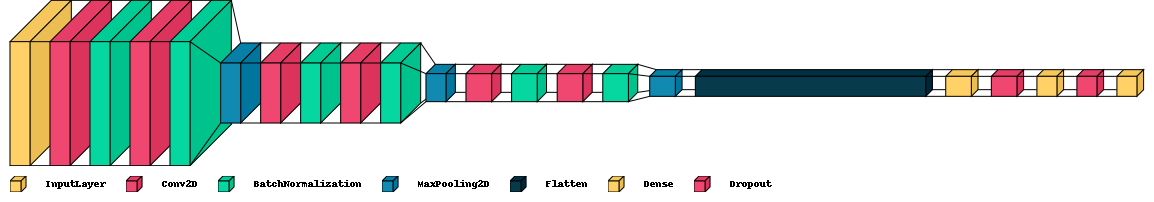

In [24]:
layered_view(customvgg_31,
             legend=True,
             spacing=20
)

#### PREDICT FOR Y_PRED

Used `.predict()` to obtain predictions of the final model on the testing data. This allows us to use its predictions to verify the model and its weights have been successfully imported correctly.

In [25]:
y_pred_31 = customvgg_31.predict(X_test_31)
y_pred_31

 1/94 [..............................] - ETA: 19s

94/94 [==============================] - 3s 26ms/step


array([[1.00000000e+00, 8.34048596e-13, 1.93723226e-27, ...,
        2.06628182e-21, 5.19481915e-18, 3.83389914e-14],
       [1.00000000e+00, 4.04287239e-19, 1.84582896e-34, ...,
        1.28685198e-27, 9.09532137e-22, 6.96544702e-19],
       [9.99999881e-01, 1.23296600e-08, 2.60949381e-22, ...,
        2.08501374e-15, 2.88106028e-16, 3.02837443e-12],
       ...,
       [6.87276909e-14, 8.91513890e-17, 1.00874632e-24, ...,
        1.65356463e-23, 7.01782132e-21, 1.00000000e+00],
       [3.34785675e-08, 7.48466455e-10, 6.04166646e-14, ...,
        3.01373211e-13, 1.83766873e-11, 1.00000000e+00],
       [2.92747472e-07, 5.75281200e-09, 1.00577006e-14, ...,
        2.13655116e-13, 1.68849581e-12, 9.99996543e-01]], dtype=float32)

#### CLASSIFICATION REPORT

Utilized Scikit-Learn's `classification_report()` to get a classification report of the model's performance, having metrics such as Precision, Recall, and F1-score.

- Precision: Ratio of true positives to total number of positive predictions [MINIMIZE FALSE POSITIVES]
    - Formula: True Positives / (True Positives + False Positives)

- Recall: Ratio of true positives to total number of actual positive predictions [MINIMIZE FALSE NEGATIVES]
    - Formula: True Positives / (True Positives + False Negatives)

- F1 score: Combines precision and recall scores
    - Formula: 2 * (Precision * Recall) / (Precision + Recall)


In [26]:
# Get binary label using np.argmax() to get index. E.g. np.argmax([0,0,0,1]) will return binary value 3
y_test_binary, y_pred_31_binary = np.argmax(y_test, axis=1), np.argmax(y_pred_31, axis=1)
report_31 = classification_report(y_test_binary, y_pred_31_binary, target_names=labels.values())
print(report_31)

              precision    recall  f1-score   support

        Bean       0.95      0.99      0.97       200
Bitter_Gourd       0.98      0.96      0.97       200
Bottle_Gourd       0.98      0.99      0.99       200
     Brinjal       0.92      0.96      0.94       200
    Broccoli       0.95      0.96      0.96       200
     Cabbage       0.98      0.92      0.95       200
    Capsicum       0.97      0.97      0.97       200
      Carrot       0.97      0.95      0.96       200
 Cauliflower       0.93      0.97      0.95       200
    Cucumber       0.96      0.99      0.98       200
      Papaya       0.95      0.94      0.95       200
      Potato       0.95      0.94      0.94       200
     Pumpkin       0.96      0.96      0.96       200
      Radish       0.98      0.92      0.95       200
      Tomato       0.92      0.93      0.92       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96   

#### CONFUSION MATRIX

Plotted a confusion matrix to visualize how well the model predicts each label of vegetables.

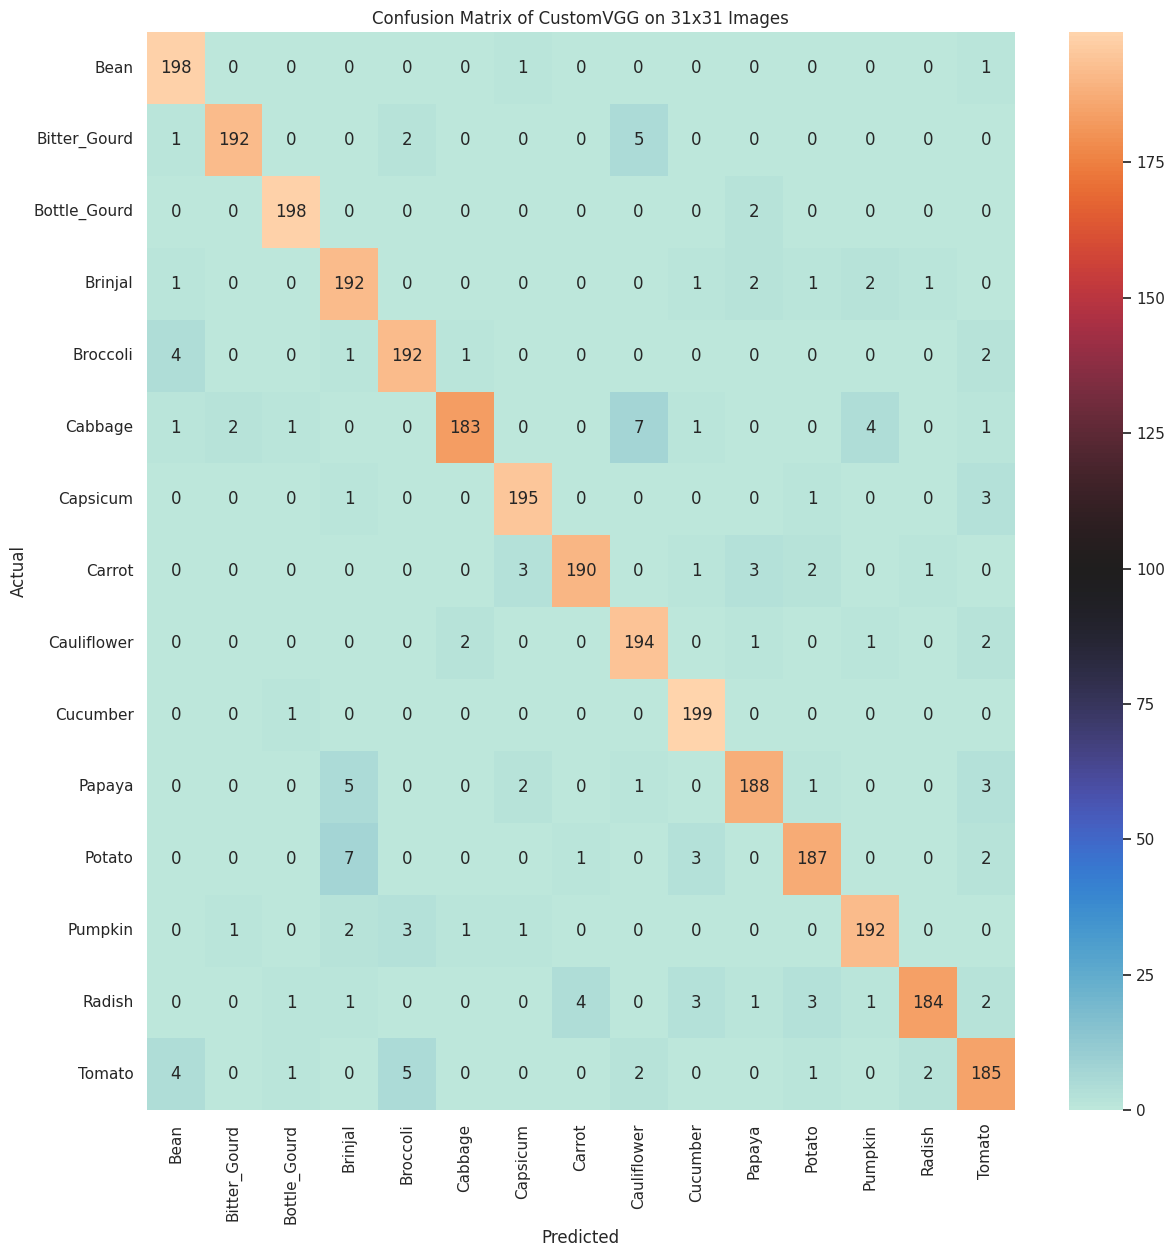

In [27]:
confusion_matrix(y_test=y_test_binary, y_pred=y_pred_31_binary, title=' of CustomVGG on 31x31 Images')

#### ERROR ANALYSIS

For the error analysis, I plotted the first 30 incorrect predictions made by the model to visualize where the model went wrong in its vegetable prediction.

x--------------------------------------------------x
Number of incorrect predictions in total: 131
x--------------------------------------------------x


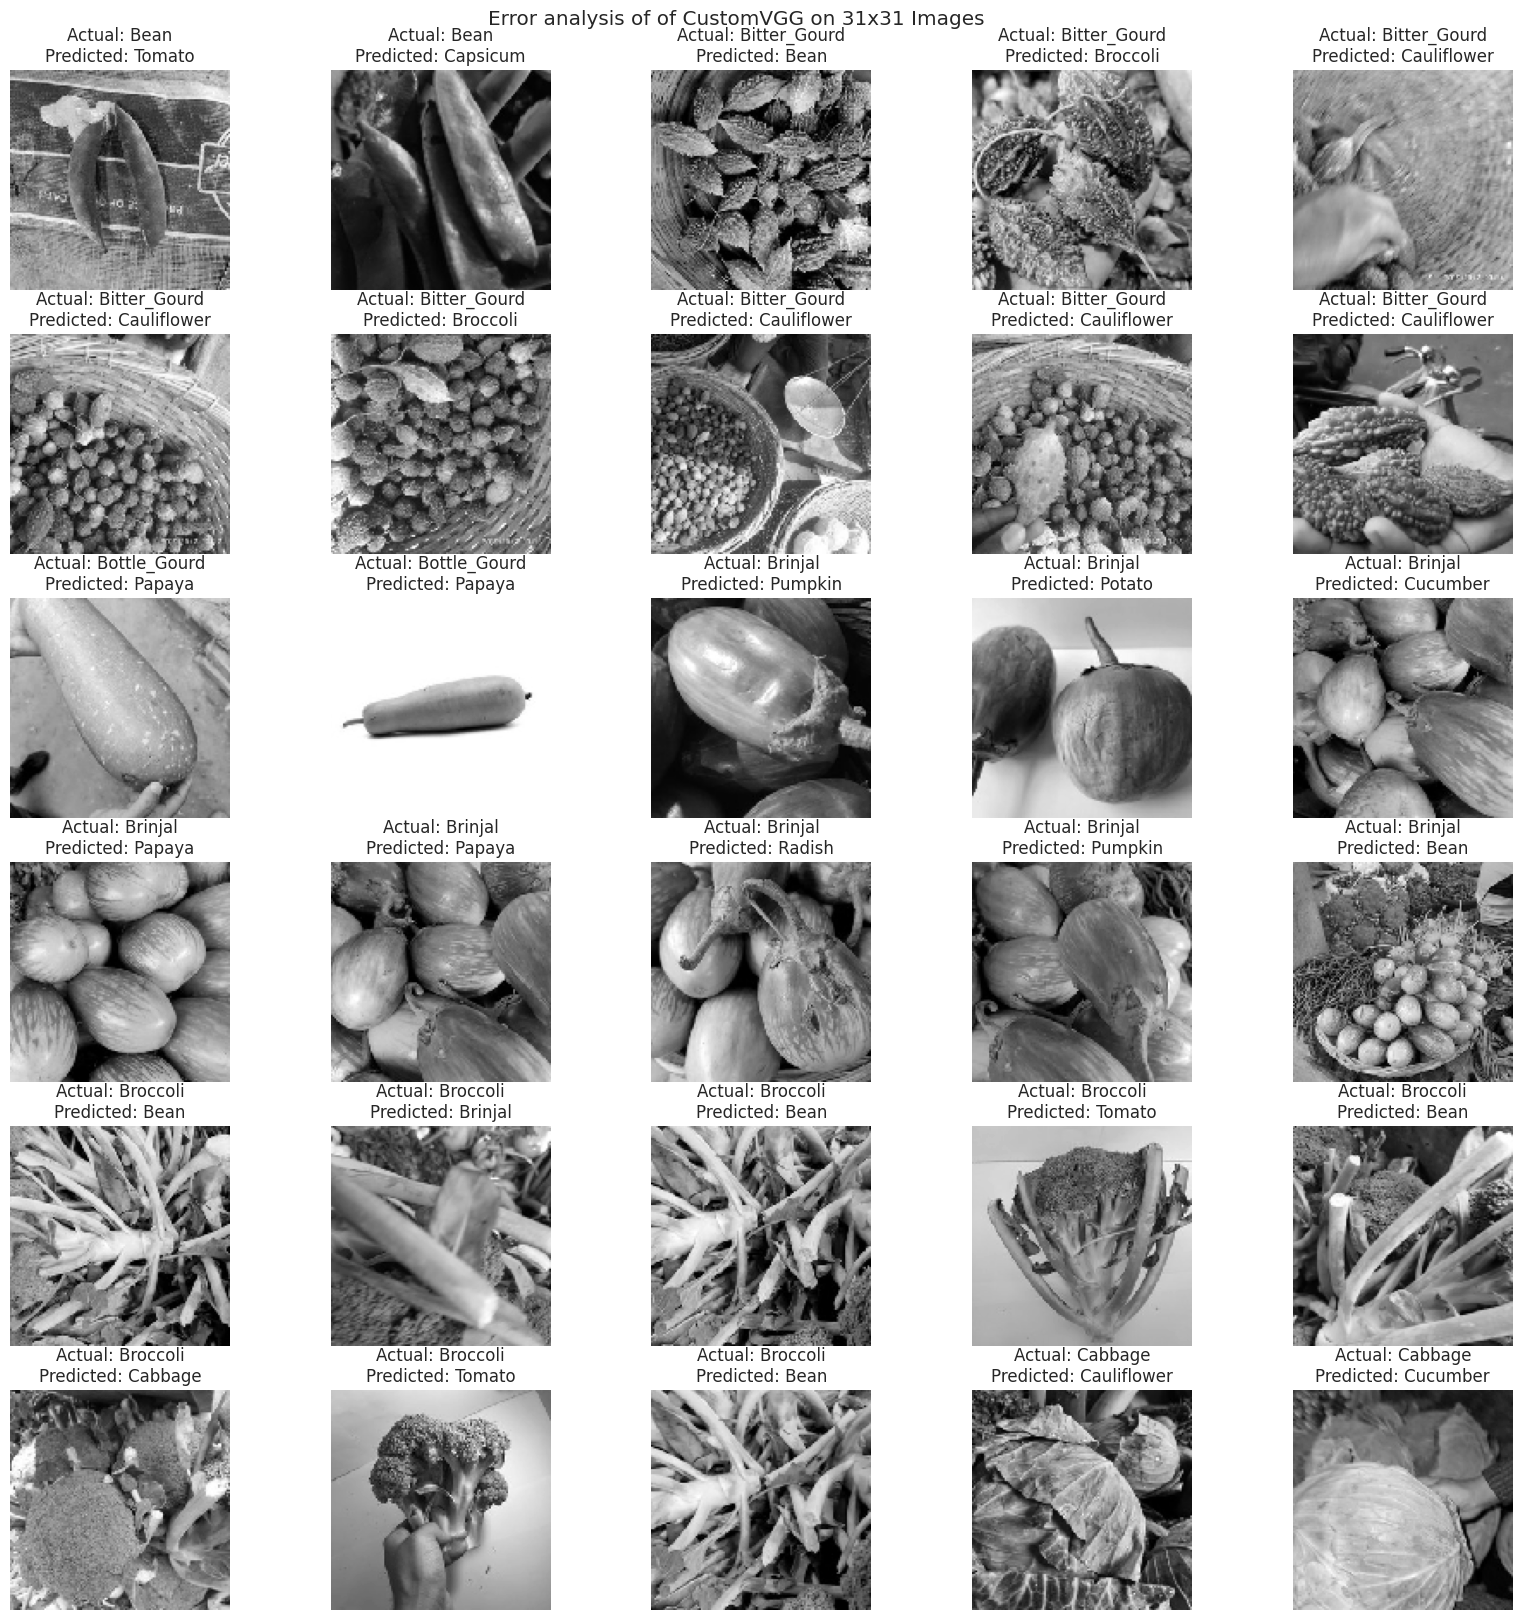

In [28]:
error_analysis(y_test=y_test_binary, 
               y_pred=y_pred_31_binary, 
               title=' of CustomVGG on 31x31 Images', 
               X_test=X_test_128, 
               labels=labels
)

ANALYSIS:
- We can see that the model performs quite well for most of the vegetable labels, attaining scores above 0.92, and some having around 0.98 to 0.99, such as recall for Beans or Cucumber and recall and f1 for Bottle Gourds.
- The accuracy of 0.96 is also excellent for a classification model though performing slightly worse compared to the 128x128 images model, likely due to the images lacking distinct features due to lower resolutions, but still far exceeds the minimum requirement of 70% accuracy, hence we will be deploying this model as well.
- From the confusion matrix and error analysis, we can also see that it made minimal mistakes and compared to the DELE CA1 Part A of the model, the results were the same, telling us that the model has been imported correctly and successfully.

## MODEL DEPLOYMENT

With both our models ready, we can now deploy the model using TensorFlow Serving, which is a serving system for machine learning models designed for production environments, allowing easy deployment of machine learning models.

### SAVE MODEL

For TensorFlow Serving, it is required for us to convert our model into a SavedModel format in order to be deployed. Hence, we will be saving the final models here to be used in TensorFlow Serving.

#### CURRENT TIMESTAMP

##### Why do we need the current timestamp?

The current timestamp will be utilized in the file path for storing the models in SavedFormat later on. 

The timestamp will serve as numerical versioning for the model in the Docker container, allowing for easier differentiation and identification between iterations of models when we choose to update the model further down the line. Furthermore, numerical versioning is compatible with CI/CD pipelines where the tools can programmatically identify the latest version (highest version number in this case by timestamp) to be deployed to production. All in all, it is better practice to implement the timestamp to automatically denote the versions of the models updated compared to manually denoting them.

In [29]:
timestamp = int(time.time())
timestamp

1705840187

### CONV2D - 128x128 IMAGES

In [30]:
file_path_128 = f"./models/conv2d128/{timestamp}"
conv2d_128.save(filepath=file_path_128, save_format='tf')

INFO:tensorflow:Assets written to: ./models/conv2d128/1705840187/assets


INFO:tensorflow:Assets written to: ./models/conv2d128/1705840187/assets


### CUSTOMVGG - 31x31 IMAGES

In [31]:
file_path_31 = f"./models/customvgg31/{timestamp}"
customvgg_31.save(filepath=file_path_31, save_format='tf')

INFO:tensorflow:Assets written to: ./models/customvgg31/1705840187/assets


INFO:tensorflow:Assets written to: ./models/customvgg31/1705840187/assets


Now the model has been saved as the `SavedModel` format, where we can deploy this model using TensorFlow Serving.

## TENSORFLOW SERVING DEPLOYMENT DOCUMENTATION

#### <u>Deploying model locally</u>

To begin deploying the model, we will have to download the models from the container through the GitLab Repository, and I will store it locally in my C:/ Drive.

GitLab Repository of Model Folder:

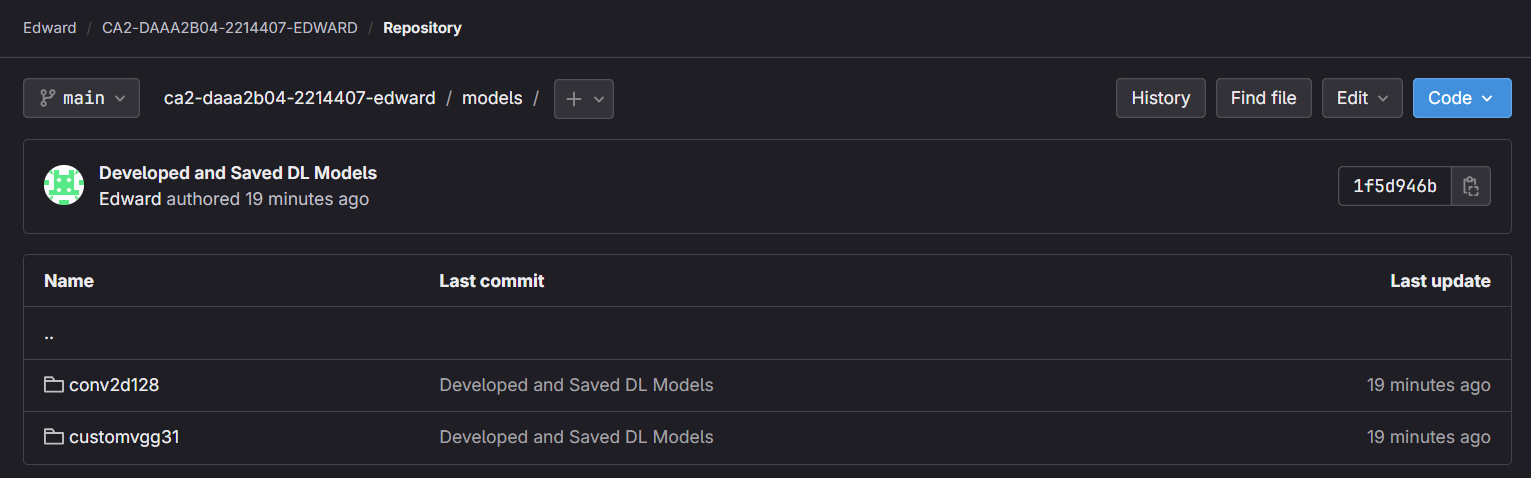

Installation will be done by clicking `Code` on the top right, and downloading the zip folder of the directory, then unzipping it in the C:/ Drive.

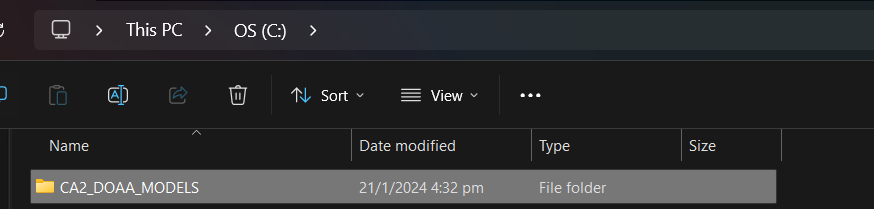

Each model's folder should contains these

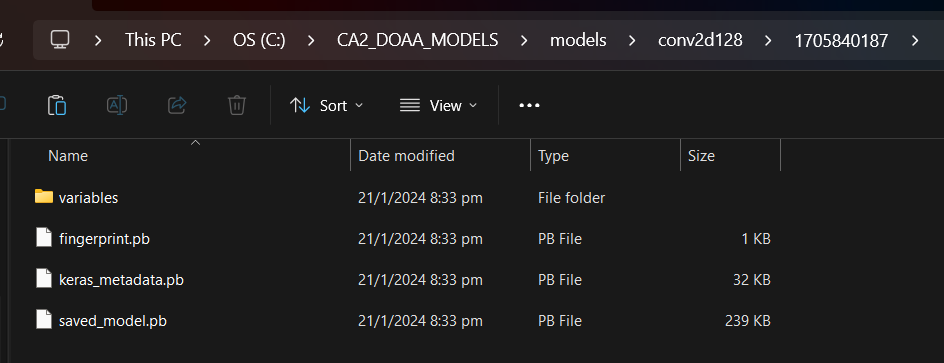

These are the files required to perform the model's predictions.

Next, we will also have to install the `model_config.conf` file, as I intend to create a model server for multiple models, and this config file will be utilized to do that.

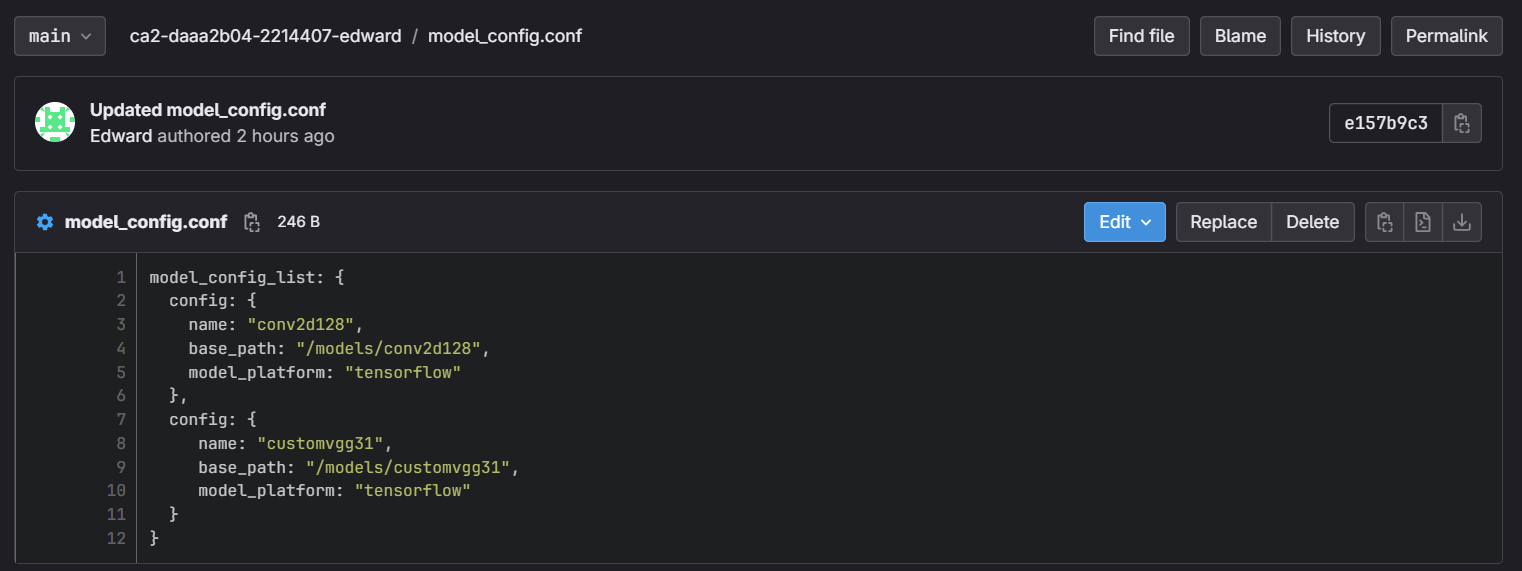

The installation of the file can be done by clicking the download button on the far middle right.

With those downloaded, we can run the config file and deploy the model in a TensorFlow server from a container using the image `tensorflow/serving`.

This will be the command we will be running in the cmd prompt:

`
docker run --name CA2_Models_Serving -p 8501:8501 --mount type=bind,source=C:/CA2_DOAA_MODELS/models/conv2d128,target=/models/conv2d128 --mount type=bind,source=C:/CA2_DOAA_MODELS/models/customvgg31,target=/models/customvgg31 --mount type=bind,source=C:/CA2_DOAA_MODELS/model_config.conf,target=/config/model_config.conf -t tensorflow/serving --model_config_file=/config/model_config.conf
`

The command differs from typical model deployment using TensorFlow Serving as I am deploying multiple models from one container.

##### Command Explanation:

- `docker run`
    - This command is used to run a command in a new Docker container.

- `--name CA2_Model_Serving`
    - Assigns the name, "CA2_Models_Serving", to the Docker container.

- `-p 8501:8501`
    - This command maps port 8501 of the container to 8501 on the host, which is used for REST API requests.

- `--mount type=bind,source=C:/CA2_DOAA_MODELS/models/conv2d128,target=/models/conv2d128`
    - This option mounts the conv2d128 model directory from local system to the /models/conv2d128 directory inside the Docker container. The type=bind part indicates that it's a bind mount, which allows mounting a specific file or directory from local to the Docker container.

- `--mount type=bind,source=C:/CA2_DOAA_MODELS/models/customvgg31,target=/models/customvgg31`
    - Similar to the previous mount command, but for the customvgg31 model.

- `--mount type=bind,source=C:/CA2_DOAA_MODELS/model_config.conf,target=/config/model_config.conf`
    - This mounts the model_config.conf file from the host system to the /config/model_config.conf file inside the container.

- `-t tensorflow/serving`
    - Use the tensorflow/serving image to serve TensorFlow models.

- `--model_config_file=/config/model_config.conf`
    - This is an argument passed to the TensorFlow Serving application running inside the container, telling it where to find the model configuration file `model_config.conf` added earlier.

After the command has successfully ran, the output should look like this:

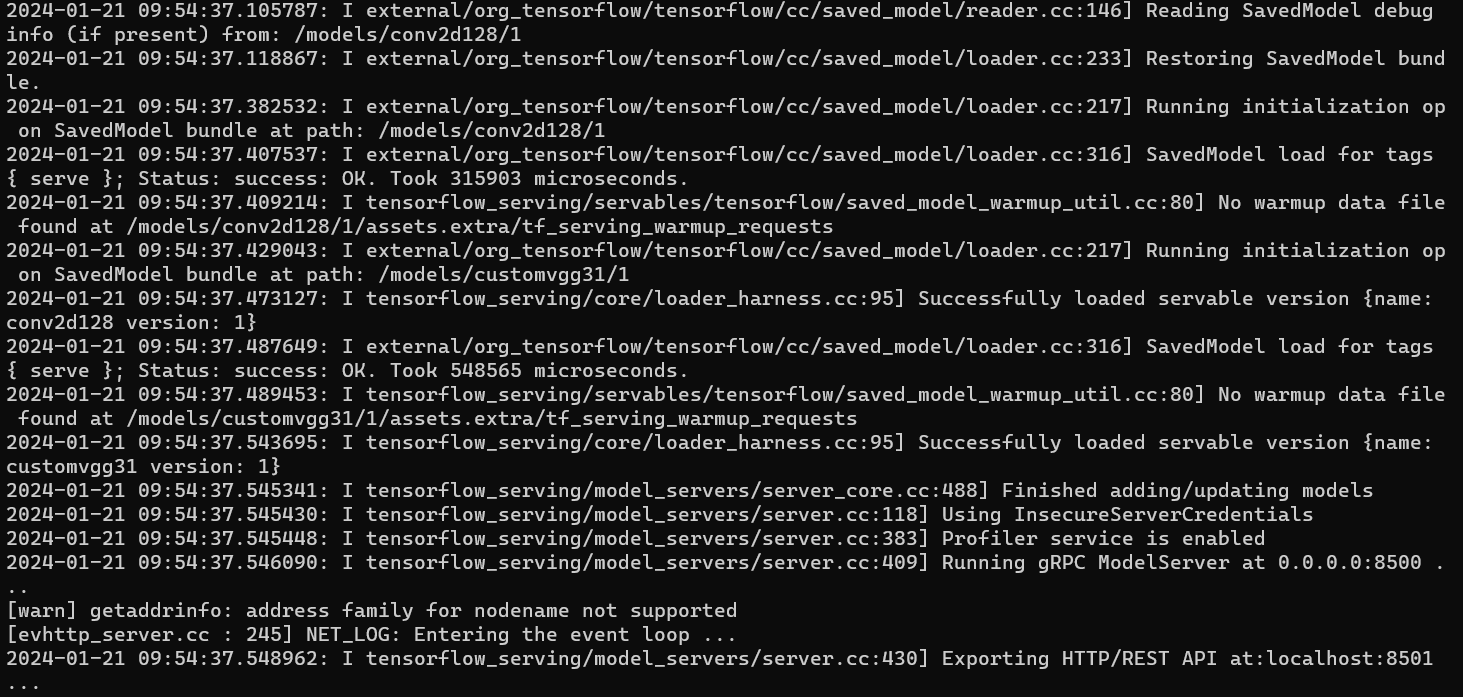

And on Docker, there should now be a container called CA2_Models_Serving as shown below

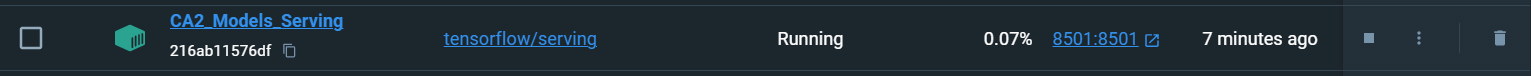

To verify it works, the links to the models are

Conv2D for 128x128 images: http://localhost:8501/v1/models/conv2d128

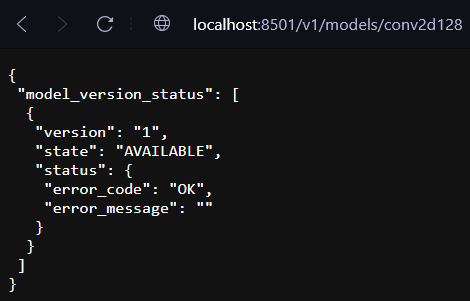

CustomVGG for 31x31 images: http://localhost:8501/v1/models/customvgg31

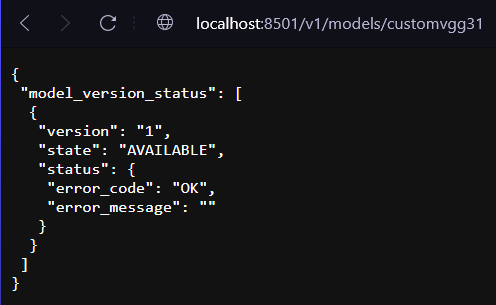

#### <u>Setting up a network connection</u>
Next, we need to set up a network connection between CA2_Models_Server and CA2_Models_Serving as it allows for automated model deployment where when a new model is added to the repository, it can automatically be pushed to the serving container without manual intervention, enabling a smoother CI/CD pipeline for the models further down the road.

To begin, we will set up a network called ca2_dl_network

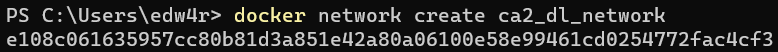

And connect both containers to the network

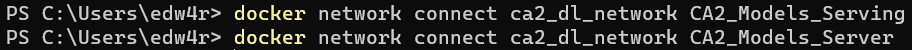

Now, we will test the network by pinging it to verify that the connection is up.

To install the ping program if needed, run `apt-get update`, followed by `apt-get install iputils-ping`

To ping the network, run `ping CA2_Models_Serving` and CRTL+C to stop the pinging

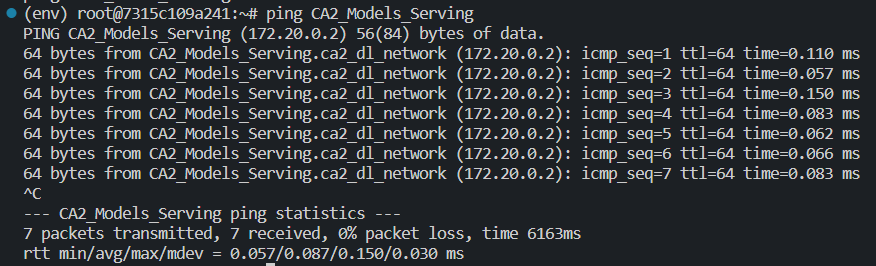

#### <u>Unit Testing for Models</u>

Next, we will implement unit testing for the models using PyTest to ensure the REST APIs do work in its predictions. 

We create the tests folder and the test_docker.py file in order to code the pytests that will be ran to test the APIs.

In order to test the APIs, we will run `python -m pytest -v` to run the pytests created in the file.

Output:
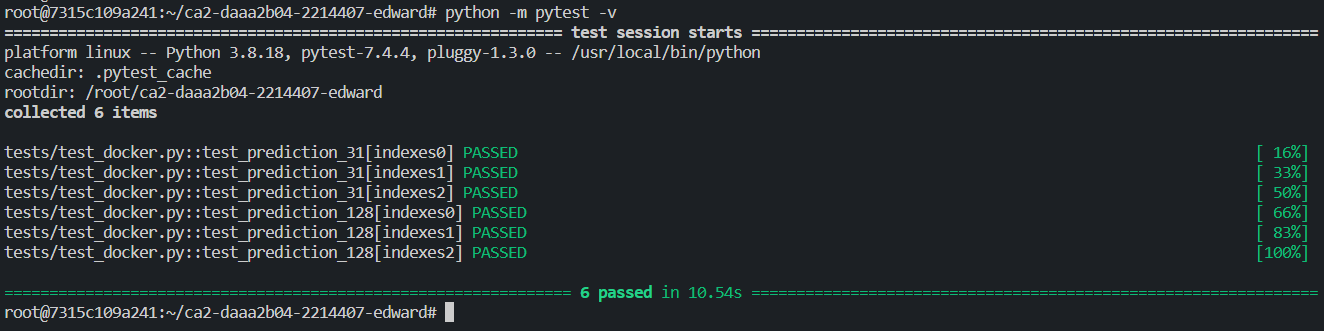

This shows that our models successfully made the predictions and the APIs do work. Now, we can proceed onto the last step before deploying our models onto Render.

#### <u>Preparing Dockerfile for Deployment</u>

Before we deploy our model, we need a Dockerfile in order to build the image for Render to deploy our models.

Hence, we create the `Dockerfile`, and code in the commands to assemble the image, as shown below.

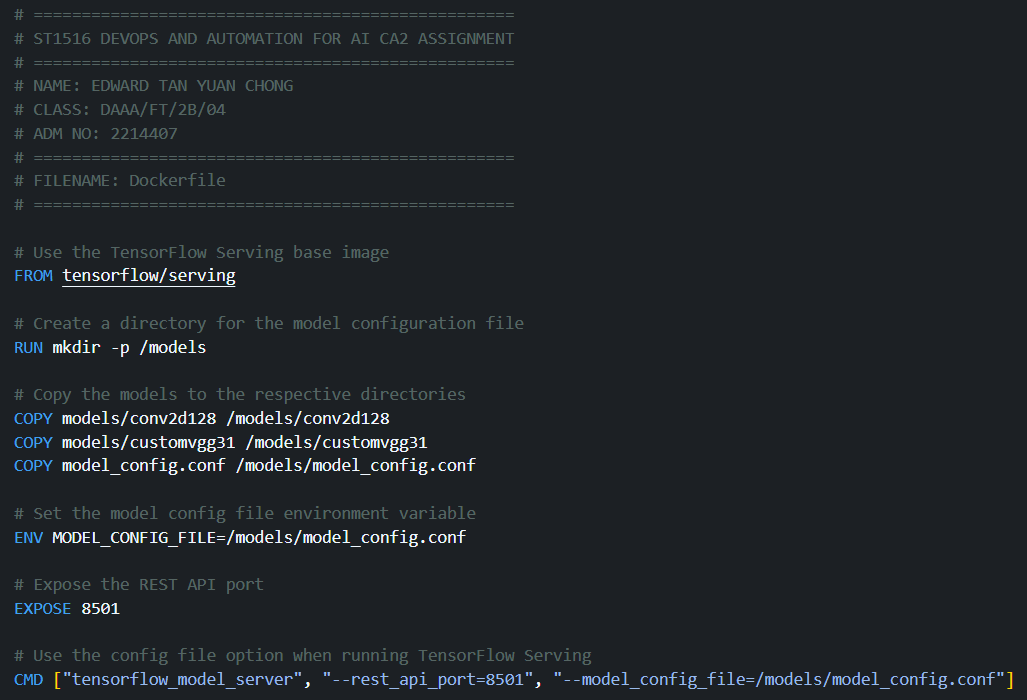

#### <u>Deploy Model onto Render</u>

Now, it is time to deploy our models!

Head over to dashboard.render.com, and click the "New +" button next to the username on the top right.

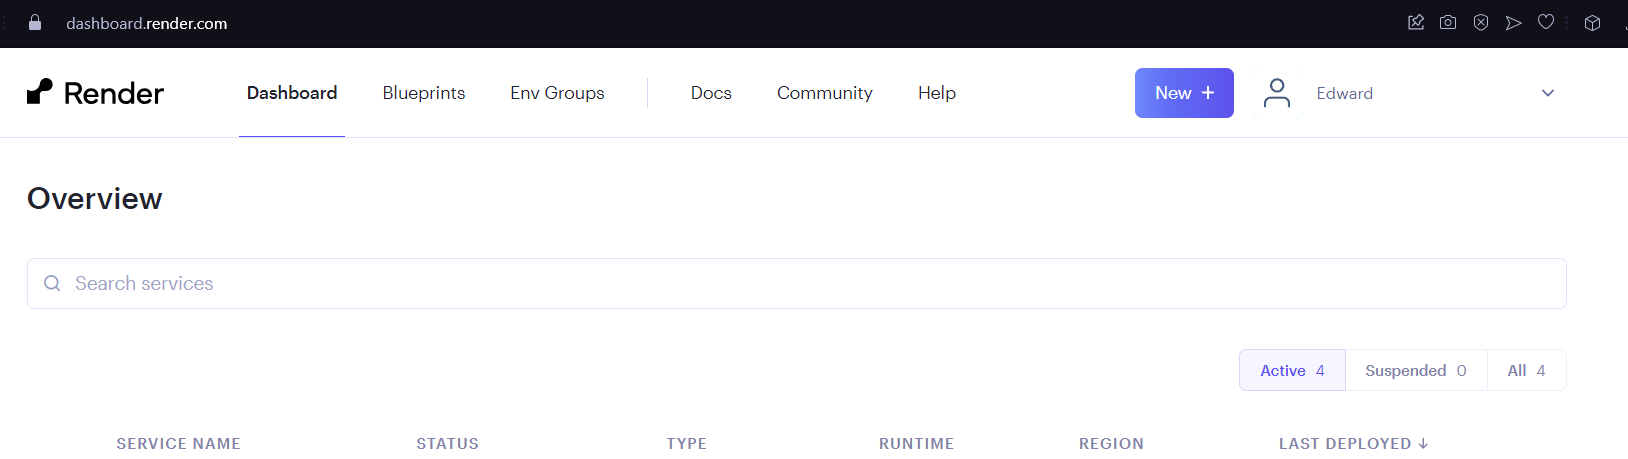

Then, select "Web Service"

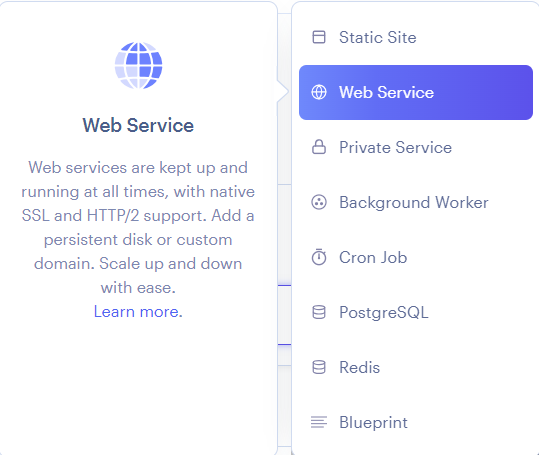

Followed by "Build and deploy from a Git repository"

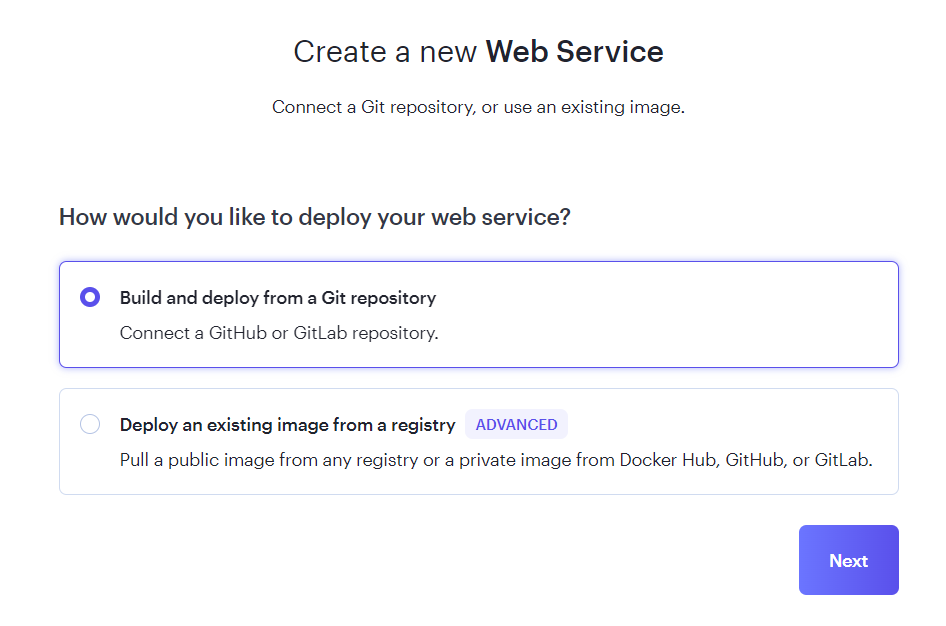

We then connect this repository

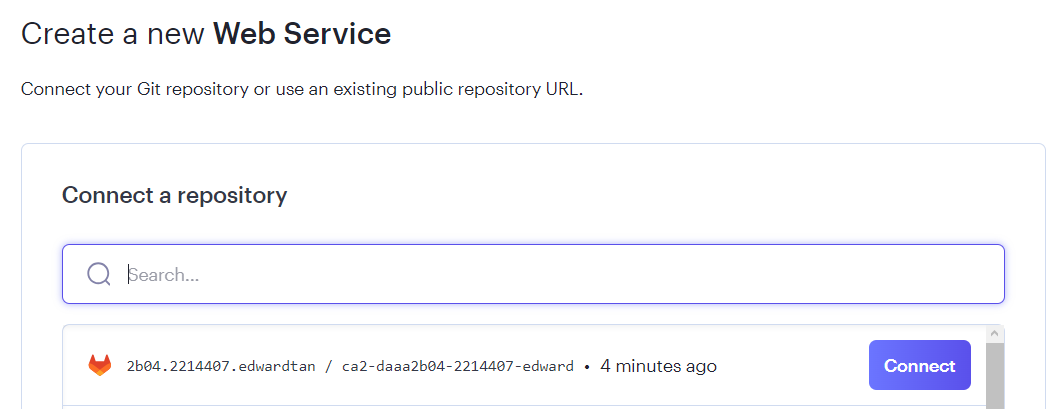

And fill out the website's information such as name, branch etc, and click "Create Web Service"

With that, Render will take care of the rest of the deployment.

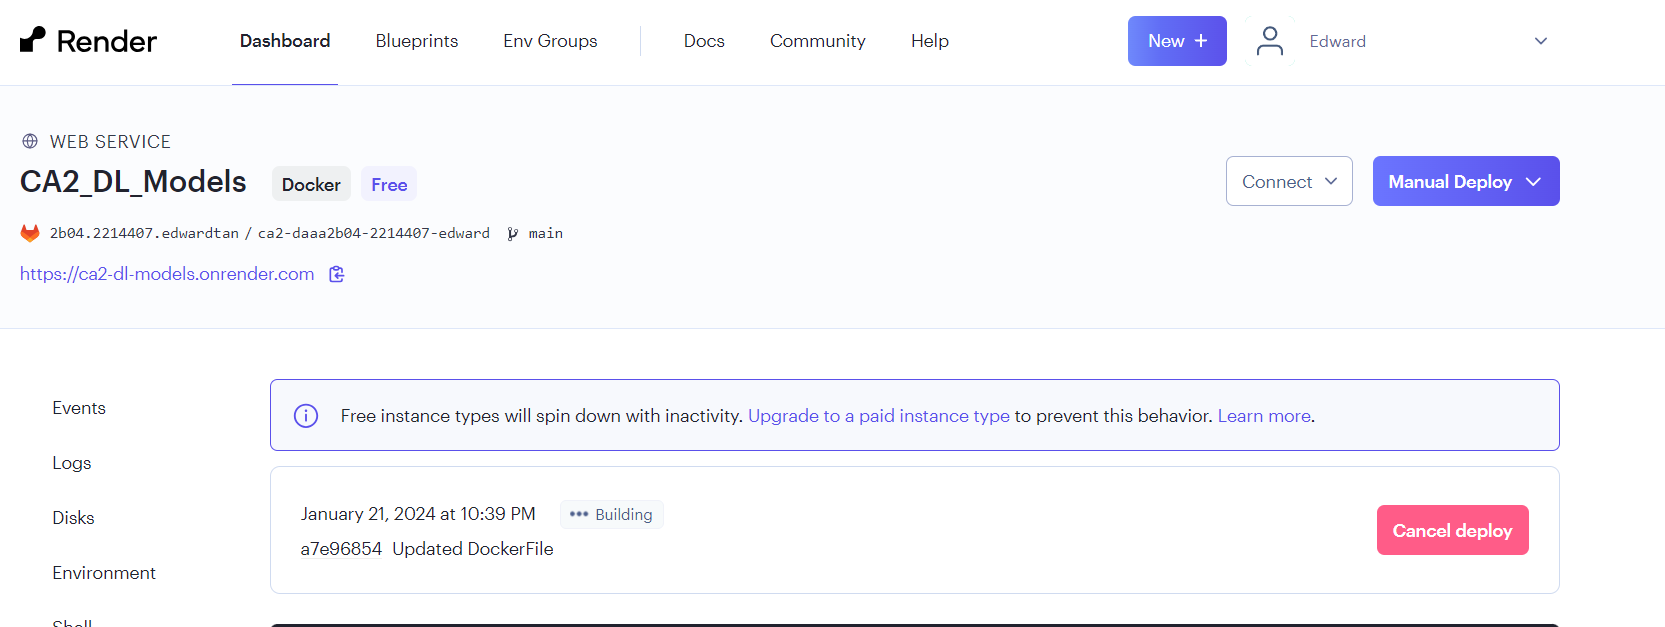

After it has successfully been deployed, Render will show that it is "Live" as shown below

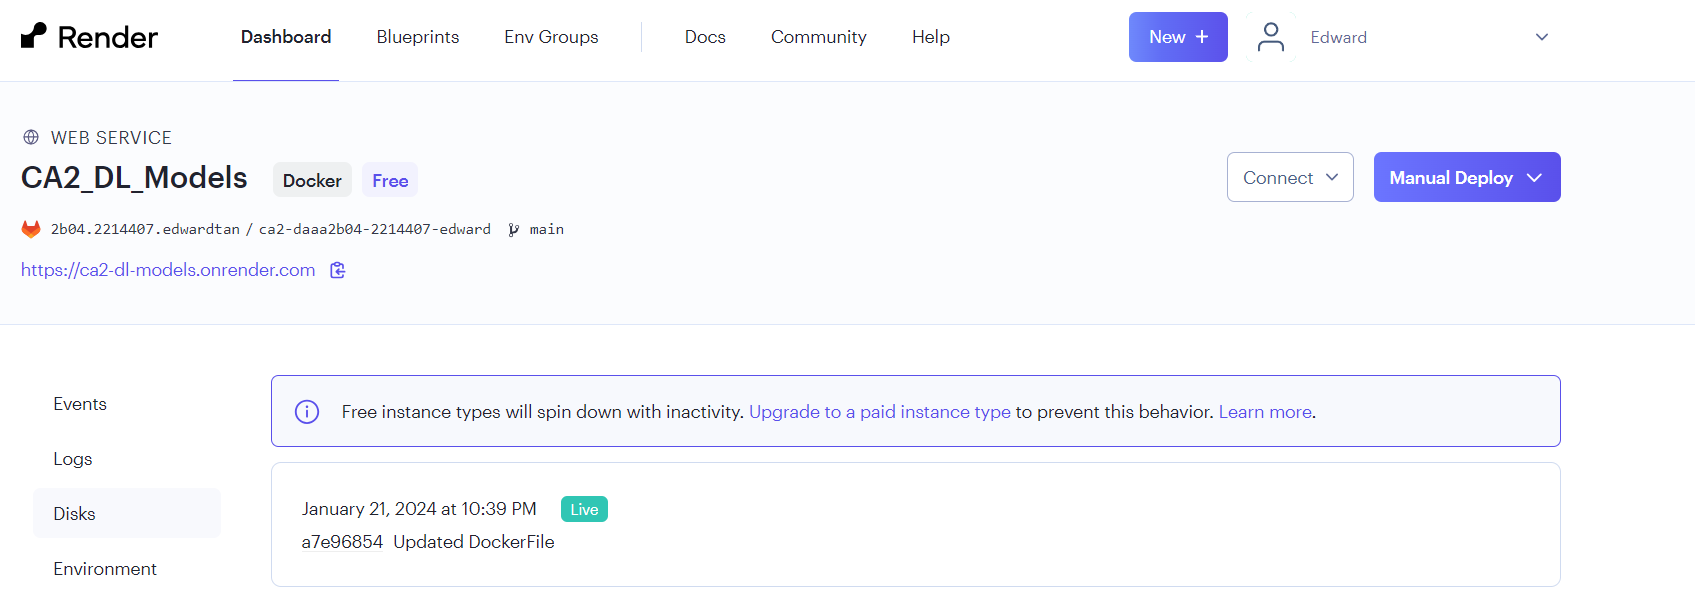

We can then head to the two links below to access each of the deep learning models from their respective APIs.

#### MODEL LINKS FROM RENDER

CUSTOMVGG FOR 31x31 IMAGES: https://ca2-dl-models.onrender.com/v1/models/customvgg31

CONV2D FOR 128x128 IMAGES: https://ca2-dl-models.onrender.com/v1/models/conv2d128

And each of the website should show 

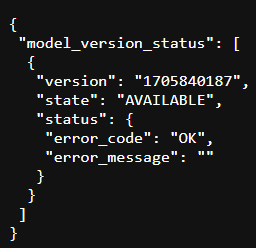

indicating that it has successfully been deployed!